In [22]:
import time
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import plot_model
from sklearn import datasets 
from sklearn import svm
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import confusion_matrix,accuracy_score
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import LabelEncoder
import seaborn as sn
import time
import os

In [23]:
import pandas as pd
def open_file(location):
    return pd.read_csv(location)

In [24]:
train_data = open_file("train.csv")
print(train_data.shape)

test_data = open_file("test.csv")
print(test_data.shape)

(7352, 563)
(2947, 563)


In [25]:
# DATA VERIFICATION - Check the number of datapoints by activity (pre-labelled data)
train_data['Activity'].groupby(train_data['Activity']).count()

Activity
LAYING                1407
SITTING               1286
STANDING              1374
WALKING               1226
WALKING_DOWNSTAIRS     986
WALKING_UPSTAIRS      1073
Name: Activity, dtype: int64

In [26]:
# DATA VERIFICATION - Check the number of datapoints by activity (pre-labelled data)
test_data['Activity'].groupby(test_data['Activity']).count()

Activity
LAYING                537
SITTING               491
STANDING              532
WALKING               496
WALKING_DOWNSTAIRS    420
WALKING_UPSTAIRS      471
Name: Activity, dtype: int64

In [27]:
# DATA VALIDATION - Print null data
print(train_data.isna().sum())

tBodyAcc-mean()-X       0
tBodyAcc-mean()-Y       0
tBodyAcc-mean()-Z       0
tBodyAcc-std()-X        0
tBodyAcc-std()-Y        0
                       ..
angle(X,gravityMean)    0
angle(Y,gravityMean)    0
angle(Z,gravityMean)    0
subject                 0
Activity                0
Length: 563, dtype: int64


In [28]:
# DATA VALIDATION - Print null data
print(test_data.isna().sum())

tBodyAcc-mean()-X       0
tBodyAcc-mean()-Y       0
tBodyAcc-mean()-Z       0
tBodyAcc-std()-X        0
tBodyAcc-std()-Y        0
                       ..
angle(X,gravityMean)    0
angle(Y,gravityMean)    0
angle(Z,gravityMean)    0
subject                 0
Activity                0
Length: 563, dtype: int64


In [29]:
# Separate the data into input variables (x) and output variables (y)
X_train = train_data.drop(['Activity'],axis=1)
y_train = train_data['Activity']

In [30]:
X_test = test_data.drop(['Activity'],axis=1)
y_test = test_data['Activity']


In [31]:
from sklearn.preprocessing import LabelEncoder,OrdinalEncoder
import pandas as pd
#encoder=OrdinalEncoder()
#y_train=encoder.fit_transform(y_train)
#y_train=pd.get_dummies(y_train).values
y_train=y_train.replace(['STANDING'],0)
y_train=y_train.replace(['LAYING'],1)
y_train=y_train.replace(['SITTING'],2)
y_train=y_train.replace(['WALKING'],3)
y_train=y_train.replace(['WALKING_DOWNSTAIRS'],4)
y_train=y_train.replace(['WALKING_UPSTAIRS'],5)
print(y_train)
y_test=y_test.replace(['STANDING'],0)
y_test=y_test.replace(['LAYING'],1)
y_test=y_test.replace(['SITTING'],2)
y_test=y_test.replace(['WALKING'],3)
y_test=y_test.replace(['WALKING_DOWNSTAIRS'],4)
y_test=y_test.replace(['WALKING_UPSTAIRS'],5)
print(y_test)

0       0
1       0
2       0
3       0
4       0
       ..
7347    5
7348    5
7349    5
7350    5
7351    5
Name: Activity, Length: 7352, dtype: int64
0       0
1       0
2       0
3       0
4       0
       ..
2942    5
2943    5
2944    5
2945    5
2946    5
Name: Activity, Length: 2947, dtype: int64


In [32]:
# Encode train label into numbers
encoder=LabelEncoder()
y_test=encoder.fit_transform(y_test)
y_test=pd.get_dummies(y_test).values
print(y_test)

[[1 0 0 0 0 0]
 [1 0 0 0 0 0]
 [1 0 0 0 0 0]
 ...
 [0 0 0 0 0 1]
 [0 0 0 0 0 1]
 [0 0 0 0 0 1]]


In [33]:
# Check shape of array for input dimensions
print(X_train.shape)
INPUT_DIM_ARR = np. asarray(X_train.shape)
INPUT_DIM = INPUT_DIM_ARR[1]
print(INPUT_DIM)

(7352, 562)
562


In [38]:
# Encode train label into numbers
encoder=LabelEncoder()
y_train=encoder.fit_transform(y_train)
y_train=pd.get_dummies(y_train).values
print(y_train)
encoder=LabelEncoder()
y_test=encoder.fit_transform(y_test)
y_test=pd.get_dummies(y_test).values
print(y_test)


[[1 0 0 0 0 0]
 [1 0 0 0 0 0]
 [1 0 0 0 0 0]
 ...
 [0 0 0 0 0 1]
 [0 0 0 0 0 1]
 [0 0 0 0 0 1]]


ValueError: y should be a 1d array, got an array of shape (2947, 6) instead.

In [39]:
y_test.shape

(2947, 6)

In [40]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import plot_model

In [41]:
# Define the keras MLP model
MLP = Sequential()
MLP.add(Dense(48, input_dim=562, activation='relu'))
MLP.add(Dense(36, activation='relu'))
MLP.add(Dense(24, activation='relu'))
MLP.add(Dense(12, activation='relu'))
MLP.add(Dense(6, activation='softmax'))
MLP.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [42]:
# compile the keras model
MLP.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [43]:
print(y_train)


[[1 0 0 0 0 0]
 [1 0 0 0 0 0]
 [1 0 0 0 0 0]
 ...
 [0 0 0 0 0 1]
 [0 0 0 0 0 1]
 [0 0 0 0 0 1]]


In [44]:
# Implementing K-fold Cross Validation for model selection (MLP)
k = 10
validation_acc = []
f1_acc = []
kf = KFold(n_splits=k, random_state=None)

for train_index , test_index in kf.split(X_train):
    
    X_vtrain, X_vtest = X_train.iloc[train_index,:],X_train.iloc[test_index,:]
    y_vtrain, y_vtest = y_train[train_index] , y_train[test_index]
   
    MLP.fit(X_vtrain,y_vtrain,epochs=10,batch_size=100)    
    
    y_vpred = MLP.predict(X_vtest)
    
    y_vtest_class=np.argmax(y_vtest,axis=1)
    y_vpred_class=np.argmax(y_vpred,axis=1)
    
    acc = accuracy_score(y_vtest_class, y_vpred_class)
    validation_acc.append(acc)
    f1 = f1_score(y_true=y_vtest_class,y_pred=y_vpred_class,average="micro")
    f1_acc.append(f1)
    
average_validation_acc = sum(validation_acc)/k
average_validation_f1 = sum(f1_acc)/k

print('Accuracy of each fold - {}'.format(validation_acc))
print('Average accuracy : {}'.format(average_validation_acc))

print('F1 of each fold - {}'.format(f1_acc))
print('Average F1 : {}'.format(average_validation_f1))

Epoch 1/10
67/67 [==============================] - 0s 874us/step - loss: 1.0027 - accuracy: 0.6061
Epoch 2/10
67/67 [==============================] - 0s 935us/step - loss: 0.4475 - accuracy: 0.8427
Epoch 3/10
67/67 [==============================] - 0s 939us/step - loss: 0.2754 - accuracy: 0.9135
Epoch 4/10
67/67 [==============================] - 0s 1ms/step - loss: 0.1858 - accuracy: 0.9403
Epoch 5/10
67/67 [==============================] - 0s 944us/step - loss: 0.1509 - accuracy: 0.9448
Epoch 6/10
67/67 [==============================] - 0s 964us/step - loss: 0.1152 - accuracy: 0.9618
Epoch 7/10
67/67 [==============================] - 0s 958us/step - loss: 0.1110 - accuracy: 0.9598
Epoch 8/10
67/67 [==============================] - 0s 910us/step - loss: 0.1127 - accuracy: 0.9571
Epoch 9/10
67/67 [==============================] - 0s 1ms/step - loss: 0.0886 - accuracy: 0.9660
Epoch 10/10
67/67 [==============================] - 0s 1ms/step - loss: 0.0755 - accuracy: 0.9743
Epoch

67/67 [==============================] - 0s 980us/step - loss: 0.0341 - accuracy: 0.9882
Epoch 4/10
67/67 [==============================] - 0s 920us/step - loss: 0.0228 - accuracy: 0.9911
Epoch 5/10
67/67 [==============================] - 0s 1ms/step - loss: 0.0205 - accuracy: 0.9923
Epoch 6/10
67/67 [==============================] - 0s 971us/step - loss: 0.0112 - accuracy: 0.9967
Epoch 7/10
67/67 [==============================] - 0s 927us/step - loss: 0.0133 - accuracy: 0.9950
Epoch 8/10
67/67 [==============================] - 0s 924us/step - loss: 0.0160 - accuracy: 0.9949
Epoch 9/10
67/67 [==============================] - 0s 948us/step - loss: 0.0168 - accuracy: 0.9941
Epoch 10/10
67/67 [==============================] - 0s 894us/step - loss: 0.0120 - accuracy: 0.9961
Epoch 1/10
67/67 [==============================] - 0s 1ms/step - loss: 0.0215 - accuracy: 0.9917
Epoch 2/10
67/67 [==============================] - 0s 1ms/step - loss: 0.0240 - accuracy: 0.9914
Epoch 3/10
67/67

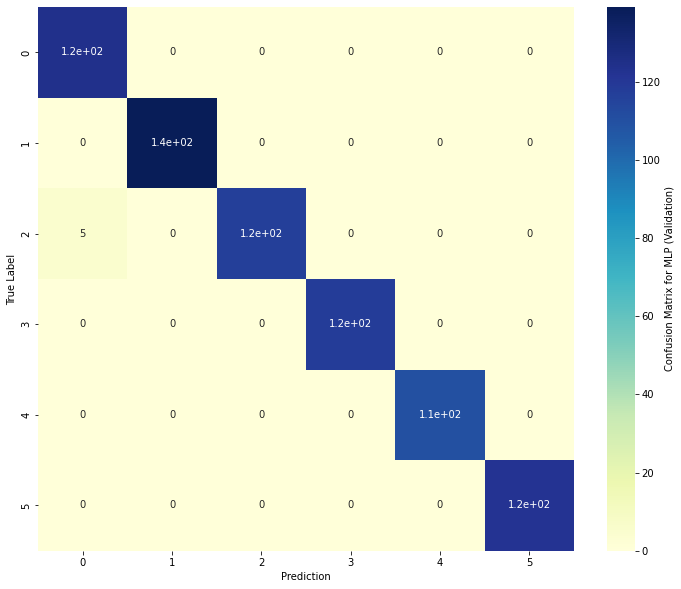

0.9931972789115646

In [55]:
y_test_class=np.argmax(y_vtest,axis=1)
y_pred_class=np.argmax(y_vpred,axis=1)
cm=confusion_matrix(y_vtest_class,y_vpred_class)
accuracy=accuracy_score(y_vtest_class,y_vpred_class)
plt.figure(figsize = (12, 10))
sn.heatmap(cm, annot=True,cmap="YlGnBu",cbar_kws={'label': 'Confusion Matrix for MLP (Validation)'})
plt.xlabel("Prediction")
plt.ylabel("True Label") 
plt.show()
accuracy

In [56]:
MLP.fit(X_train, y_train, epochs=10, batch_size=100)


Epoch 1/10
74/74 [==============================] - 0s 990us/step - loss: 0.0117 - accuracy: 0.9955
Epoch 2/10
74/74 [==============================] - 0s 877us/step - loss: 0.0063 - accuracy: 0.9978
Epoch 3/10
74/74 [==============================] - 0s 902us/step - loss: 0.0070 - accuracy: 0.9966
Epoch 4/10
74/74 [==============================] - 0s 907us/step - loss: 0.0214 - accuracy: 0.9935
Epoch 5/10
74/74 [==============================] - 0s 882us/step - loss: 0.0197 - accuracy: 0.9936
Epoch 6/10
74/74 [==============================] - 0s 907us/step - loss: 0.0078 - accuracy: 0.9971
Epoch 7/10
74/74 [==============================] - 0s 973us/step - loss: 0.0303 - accuracy: 0.9916
Epoch 8/10
74/74 [==============================] - 0s 971us/step - loss: 0.0110 - accuracy: 0.9967
Epoch 9/10
74/74 [==============================] - 0s 1ms/step - loss: 0.0212 - accuracy: 0.9922
Epoch 10/10
74/74 [==============================] - 0s 1ms/step - loss: 0.0069 - accuracy: 0.9976


In [45]:
#Random value
X_1test=test_data.sample()
y_1test=X_1test['Activity']
X_1test=X_1test.drop(['Activity'],axis=1)
y_1test=y_1test.replace(['STANDING'],0)
y_1test=y_1test.replace(['LAYING'],1)
y_1test=y_1test.replace(['SITTING'],2)
y_1test=y_1test.replace(['WALKING'],3)
y_1test=y_1test.replace(['WALKING_DOWNSTAIRS'],4)
y_1test=y_1test.replace(['WALKING_UPSTAIRS'],5)
y_1test=y_1test.iloc[0:1]
print(y_1test)

461    5
Name: Activity, dtype: int64


In [46]:
#Single
s = time.time()
#SVM.fit(X_train,y_train)
y_pred = MLP.predict(X_1test)
y_pred = np.argmax(y_pred,axis=1)
e = time.time()
print(f"Prediction: {y_pred} \t Actual: {y_1test} \t Time(in secs): {round(e-s,3)} \t Classifier: MLP")

Prediction: [5] 	 Actual: 461    5
Name: Activity, dtype: int64 	 Time(in secs): 0.046 	 Classifier: MLP


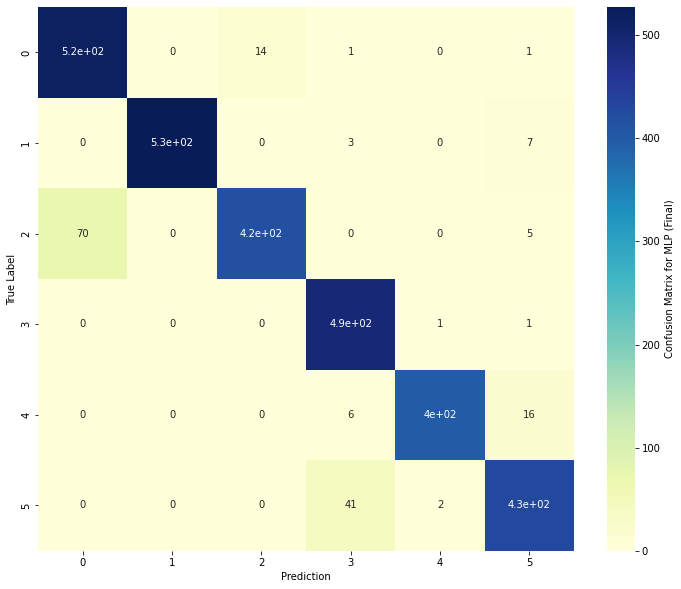

0.9429928741092637

In [47]:
y_pred = MLP.predict(X_test)
y_test_class=np.argmax(y_test,axis=1)
y_pred_class=np.argmax(y_pred,axis=1)
cm=confusion_matrix(y_test_class,y_pred_class)
accuracy=accuracy_score(y_test_class,y_pred_class)
plt.figure(figsize = (12, 10))
sn.heatmap(cm, annot=True,cmap="YlGnBu",cbar_kws={'label': 'Confusion Matrix for MLP (Final)'})
plt.xlabel("Prediction")
plt.ylabel("True Label") 
plt.show()
accuracy

In [48]:
keras_model = "tf_model.h5"

In [49]:
import tensorflow as tf
print(tf.__version__)


2.6.0


In [50]:

def get_file_size(file_path):
    size = os.path.getsize(file_path)
    return size

In [51]:

def convert_bytes(size, unit=None):
    if unit == "KB":
        return print('File size: ' + str(round(size / 1024, 3)) + ' Kilobytes')
    elif unit == "MB":
        return print('File size: ' + str(round(size / (1024 * 1024), 3)) + ' Megabytes')
    else:
        return print('File size: ' + str(size) + ' bytes')

In [52]:
MLP.save(keras_model)

In [53]:
convert_bytes(get_file_size(keras_model), "MB")

File size: 0.392 Megabytes


In [54]:
# test_size = 300
# np.random.seed(2)
# a = np.arange(2000)
# np.random.shuffle(a)
# a = a[:test_size]
# testset = test[a]
# testset.shape

test_acc = MLP.predict(X_test)
test_acc = np.argmax(test_acc, axis=1)
np.resize(test_acc, (2947,6))
print(test_acc.shape, y_test.shape)
# print(y_test)
sum = 0
for i in range (2947):
    if (1 == y_test[i][test_acc[i]]):
        print(str(test_acc[i]) + " " + str(y_test[i][test_acc[i]]))
        sum += 1
        accuracy = sum/2947 * 100
# print('Results matched = ' + str(np.sum((test_acc == y_test[test_acc]).astype(int)/test_acc.shape[0] * 100) + '%')
print(accuracy)

(2947,) (2947, 6)
0 1
0 1
0 1
0 1
0 1
0 1
0 1
0 1
0 1
0 1
0 1
0 1
0 1
0 1
0 1
0 1
0 1
0 1
0 1
0 1
0 1
0 1
0 1
0 1
0 1
0 1
0 1
0 1
0 1
0 1
0 1
2 1
2 1
2 1
2 1
2 1
2 1
2 1
2 1
2 1
2 1
2 1
2 1
2 1
2 1
2 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
3 1
3 1
3 1
3 1
3 1
3 1
3 1
3 1
3 1
3 1
3 1
3 1
3 1
3 1
3 1
3 1
3 1
3 1
3 1
3 1
3 1
3 1
3 1
3 1
3 1
3 1
3 1
3 1
3 1
3 1
4 1
4 1
4 1
4 1
4 1
4 1
4 1
4 1
4 1
4 1
4 1
4 1
4 1
4 1
4 1
4 1
4 1
4 1
4 1
4 1
4 1
4 1
4 1
5 1
5 1
5 1
5 1
5 1
5 1
5 1
5 1
5 1
5 1
5 1
5 1
5 1
5 1
5 1
5 1
5 1
5 1
5 1
5 1
5 1
5 1
5 1
5 1
5 1
0 1
0 1
0 1
0 1
0 1
0 1
0 1
0 1
0 1
0 1
0 1
0 1
0 1
0 1
0 1
0 1
0 1
0 1
0 1
0 1
0 1
0 1
0 1
2 1
2 1
2 1
2 1
2 1
2 1
2 1
2 1
2 1
2 1
2 1
2 1
2 1
2 1
2 1
2 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
3 1
3 1
3 1
3 1
3 1
3 1
3 1
3 1
3 1
3 1
3 1
3 1
3 1
3 1
3 1
3 1
3 1
3 1
3 1
3 1
3 1
3 1
3 1
3 1
3 1
3 1
3 1
3 1
3 1
4 1
4 1
4 1
4 1
4 1
4 

In [55]:
TF_LITE_MODEL_FILE_NAME = "wk9.tflite"

In [56]:
tf_lite_converter = tf.lite.TFLiteConverter.from_keras_model(MLP)
tflite_model = tf_lite_converter.convert()

INFO:tensorflow:Assets written to: C:\Users\Emily\AppData\Local\Temp\tmpglsidos4\assets


In [57]:
tflite_model_name = TF_LITE_MODEL_FILE_NAME
open(tflite_model_name, "wb").write(tflite_model)

122876

In [58]:
convert_bytes(get_file_size(TF_LITE_MODEL_FILE_NAME), "KB")


File size: 119.996 Kilobytes


In [59]:
interpreter = tf.lite.Interpreter(model_path = TF_LITE_MODEL_FILE_NAME)
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()
print("Input Shape:", input_details[0]['shape'])
print("Input Type:", input_details[0]['dtype'])
print("Output Shape:", output_details[0]['shape'])
print("Output Type:", output_details[0]['dtype'])

Input Shape: [  1 562]
Input Type: <class 'numpy.float32'>
Output Shape: [1 6]
Output Type: <class 'numpy.float32'>


In [60]:
interpreter.resize_tensor_input(input_details[0]['index'], (2947, 562))
interpreter.resize_tensor_input(output_details[0]['index'], (2947, 6))
interpreter.allocate_tensors()
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()
print("Input Shape:", input_details[0]['shape'])
print("Input Type:", input_details[0]['dtype'])
print("Output Shape:", output_details[0]['shape'])
print("Output Type:", output_details[0]['dtype'])

Input Shape: [2947  562]
Input Type: <class 'numpy.float32'>
Output Shape: [2947    6]
Output Type: <class 'numpy.float32'>


In [154]:
# test_data

In [155]:
# X_test

In [61]:
X_test_numpy = np.array(X_test, dtype=np.float32)

In [62]:
X_test_numpy.dtype

dtype('float32')

In [63]:
interpreter.set_tensor(input_details[0]['index'], X_test_numpy)
interpreter.invoke()
tflite_model_predictions = interpreter.get_tensor(output_details[0]['index'])
print("Prediction results shape:", tflite_model_predictions.shape)
prediction_classes = np.argmax(tflite_model_predictions, axis=1)

Prediction results shape: (2947, 6)


In [72]:
# print(prediction_classes)
sum = 0
import time
start_time = time.time()
for i in range (2947):
    if (1 == y_test[i][prediction_classes[i]]):
        print(str(prediction_classes[i]) + " " + str(y_test[i][prediction_classes[i]]))
        sum += 1
        accuracy = sum/2947 * 100
end_time = time.time()
# print('Results matched = ' + str(np.sum((test_acc == y_test[test_acc]).astype(int)/test_acc.shape[0] * 100) + '%')
print(accuracy)
print(end_time - start_time)

0 1
0 1
0 1
0 1
0 1
0 1
0 1
0 1
0 1
0 1
0 1
0 1
0 1
0 1
0 1
0 1
0 1
0 1
0 1
0 1
0 1
0 1
0 1
0 1
0 1
0 1
0 1
0 1
0 1
0 1
0 1
2 1
2 1
2 1
2 1
2 1
2 1
2 1
2 1
2 1
2 1
2 1
2 1
2 1
2 1
2 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
3 1
3 1
3 1
3 1
3 1
3 1
3 1
3 1
3 1
3 1
3 1
3 1
3 1
3 1
3 1
3 1
3 1
3 1
3 1
3 1
3 1
3 1
3 1
3 1
3 1
3 1
3 1
3 1
3 1
3 1
4 1
4 1
4 1
4 1
4 1
4 1
4 1
4 1
4 1
4 1
4 1
4 1
4 1
4 1
4 1
4 1
4 1
4 1
4 1
4 1
4 1
4 1
4 1
5 1
5 1
5 1
5 1
5 1
5 1
5 1
5 1
5 1
5 1
5 1
5 1
5 1
5 1
5 1
5 1
5 1
5 1
5 1
5 1
5 1
5 1
5 1
5 1
5 1
0 1
0 1
0 1
0 1
0 1
0 1
0 1
0 1
0 1
0 1
0 1
0 1
0 1
0 1
0 1
0 1
0 1
0 1
0 1
0 1
0 1
0 1
0 1
2 1
2 1
2 1
2 1
2 1
2 1
2 1
2 1
2 1
2 1
2 1
2 1
2 1
2 1
2 1
2 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
3 1
3 1
3 1
3 1
3 1
3 1
3 1
3 1
3 1
3 1
3 1
3 1
3 1
3 1
3 1
3 1
3 1
3 1
3 1
3 1
3 1
3 1
3 1
3 1
3 1
3 1
3 1
3 1
3 1
4 1
4 1
4 1
4 1
4 1
4 1
4 1
4 1
4 1
4 1


In [74]:
interpreter.resize_tensor_input(input_details[0]['index'], (562, ))
interpreter.resize_tensor_input(output_details[0]['index'], (6, ))
interpreter.allocate_tensors()
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()
print("Input Shape:", input_details[0]['shape'])
print("Input Type:", input_details[0]['dtype'])
print("Output Shape:", output_details[0]['shape'])
print("Output Type:", output_details[0]['dtype'])

Input Shape: [562]
Input Type: <class 'numpy.float32'>
Output Shape: [1 6]
Output Type: <class 'numpy.float32'>


In [75]:
X_test_numpy = np.array(X_test, dtype=np.float32)
print(X_test_numpy.shape)
X_buffer_numpy = np.zeros((1,562), dtype=np.float32)
# np.atleast_2d(X_buffer_numpy)
print(X_buffer_numpy.shape)

(2947, 562)
(1, 562)


In [76]:
X_buffer_numpy.dtype

dtype('float32')

In [79]:
def interpreter_function (X_buffer_test_numpy):
#     print(X_buffer_test_numpy[0])
    interpreter.set_tensor(input_details[0]['index'], X_buffer_test_numpy)
    interpreter.invoke()
    tflite_model_predictions = interpreter.get_tensor(output_details[0]['index'])
#     print("Prediction results shape:", tflite_model_predictions.shape)
    prediction_classes = np.argmax(tflite_model_predictions, axis=1)
#     print(prediction_classes)
    return prediction_classes

In [80]:
sum = 0
import time
start_time = time.time()
for i in range (2947):
    prediction = interpreter_function(np.array(X_test_numpy[i], dtype=np.float32))
    if (1 == y_test[i][prediction]):
        sum += 1
end_time = time.time()
accuracy = sum/2947 * 100
print(accuracy)
print(end_time - start_time)

94.29928741092637
0.04099631309509277
